In [2]:
#importing required libraries
import numpy as np
import pandas as pd

In [4]:
#Importing required files
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
#Changing the Date format to Datetime
features['Date']= features.Date.astype('datetime64[ns]')
train['Date']= train.Date.astype('datetime64[ns]')
test['Date']= test.Date.astype('datetime64[ns]')

In [6]:
# merging features dataset with store
ft_store = features.merge(stores, how='inner', on = "Store")

# merging the training dataset with the above created dataframe
train_df = train.merge(ft_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

# Merging the test dataset with previously created dataframe to maintain the regularity
test_df = test.merge(ft_store, how='inner', on = ['Store','Date','IsHoliday']).sort_values(by = ['Store','Dept','Date']).reset_index(drop=True)

In [77]:
ft_store.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [78]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,2010,3,5,9


In [9]:
test_df.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [79]:
#Creating the function to extract year, month, day & week
def extract_data(dft):
    dft['Year'] = dft.Date.dt.year
    dft['Month'] = dft.Date.dt.month
    dft['Day'] = dft.Date.dt.day
    dft['Week'] = (dft.Date.dt.isocalendar().week)

In [80]:
# Applying the above function to both train and test dataframe
extract_data(train_df)
extract_data(test_df)

In [81]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,2010,3,5,9


In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Year          115

In [15]:
# Filling the NAs with Zero
train_df.fillna(0)
test_df.fillna(0)

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,2012,11,2,44
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,2012,11,9,45
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,2012,11,16,46
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,2012,11,23,47
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315,2012,11,30,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,B,118221,2013,6,28,26
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,B,118221,2013,7,5,27
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,B,118221,2013,7,12,28
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,B,118221,2013,7,19,29


EDA

In [16]:
# Preparing Weekly sales to visualize the trend better.
import matplotlib.pyplot as plt
weekly_sales = train_df.groupby(["Year", "Week"])["Weekly_Sales"].sum().reset_index()
pivot_df = weekly_sales.pivot(index="Week", columns="Year", values="Weekly_Sales")
print (pivot_df)

Year         2010         2011         2012
Week                                       
1             NaN  42775787.77  44955421.95
2             NaN  40673678.04  42023078.48
3             NaN  40654648.03  42080996.56
4             NaN  39599852.99  39834974.67
5     49750740.50  46153111.12  46085608.09
6     48336677.63  47336192.79  50009407.92
7     48276993.78  48716164.12  50197056.96
8     43968571.13  44125859.84  45771506.57
9     46871470.30  46980603.74  46861034.97
10    45925396.51  44627319.40  47480454.11
11    44988974.64  44872325.97  46901504.94
12    44133961.05  42876199.18  44993794.45
13    50423831.26  43458991.19  45272862.02
14    47365290.44  45887466.80  53502315.87
15    45183667.08  44973328.14  46629261.41
16    44734452.56  48676692.06  45072529.78
17    43705126.71  43530032.78  43716798.89
18    48503243.52  46861958.29  47124197.93
19    45330080.20  45446144.82  46925878.99
20    45120108.06  44046598.01  46823939.22
21    47757502.56  45293457.04  

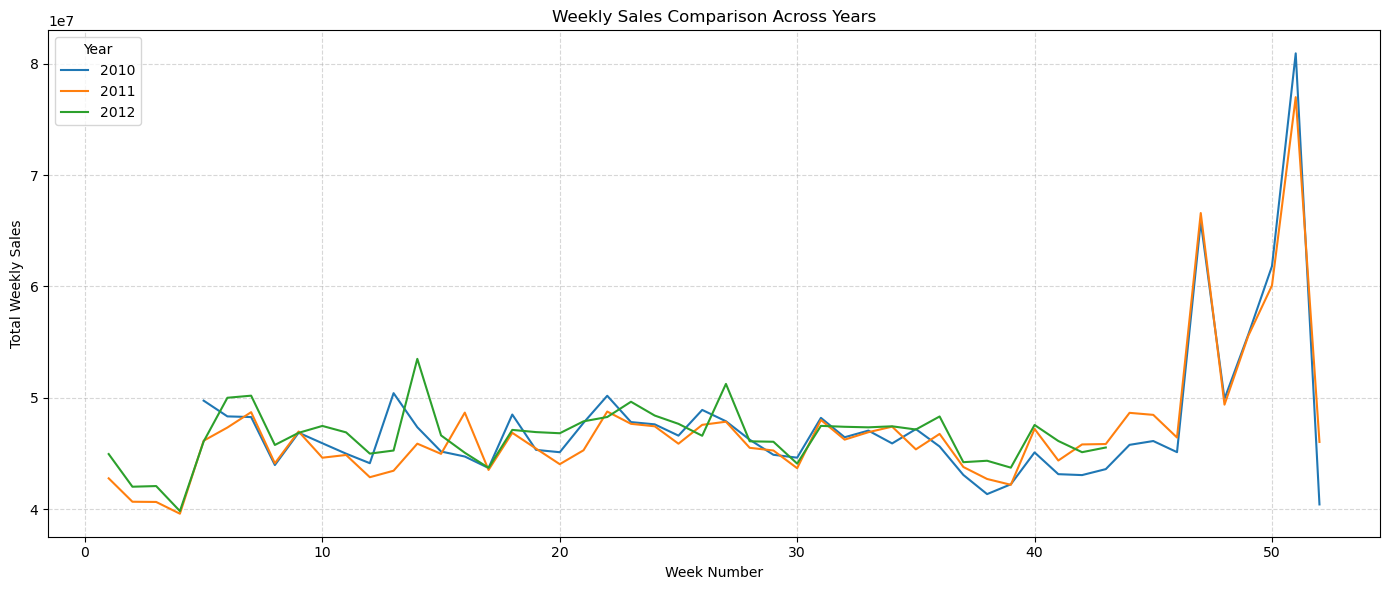

In [17]:
# Plotting Weekly sales trend for the given three years
plt.figure(figsize=(14, 6))

for year in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[year], label=str(year))

plt.title("Weekly Sales Comparison Across Years")
plt.xlabel("Week Number")
plt.ylabel("Total Weekly Sales")
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

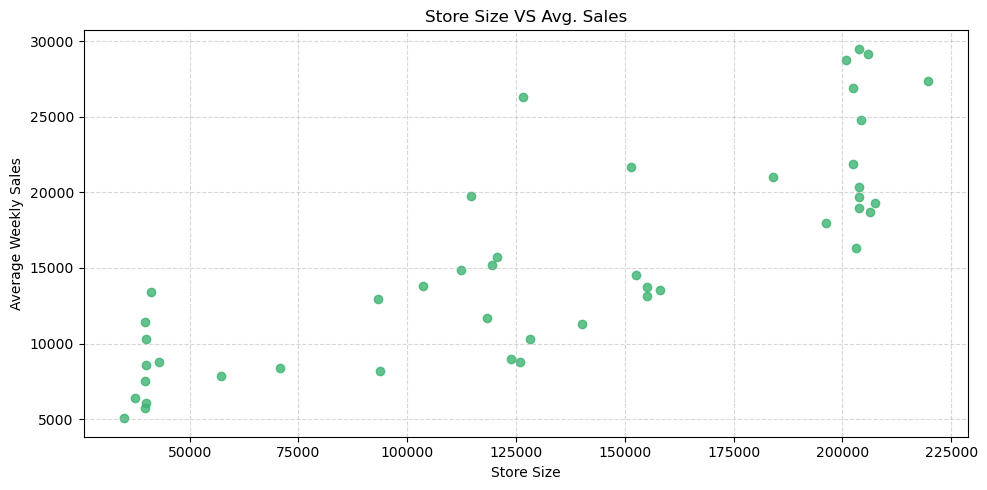

In [18]:
# Plotting Avg Sales with respect to Store Size
avg_sales_per_store = train_df.groupby("Store").agg({"Weekly_Sales":"mean","Size": "first"}).reset_index()
plt.figure(figsize=(10,5))
plt.scatter(avg_sales_per_store["Size"],avg_sales_per_store["Weekly_Sales"], color='mediumseagreen', alpha=0.8)
plt.title("Store Size VS Avg. Sales")
plt.xlabel("Store Size")
plt.ylabel("Average Weekly Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

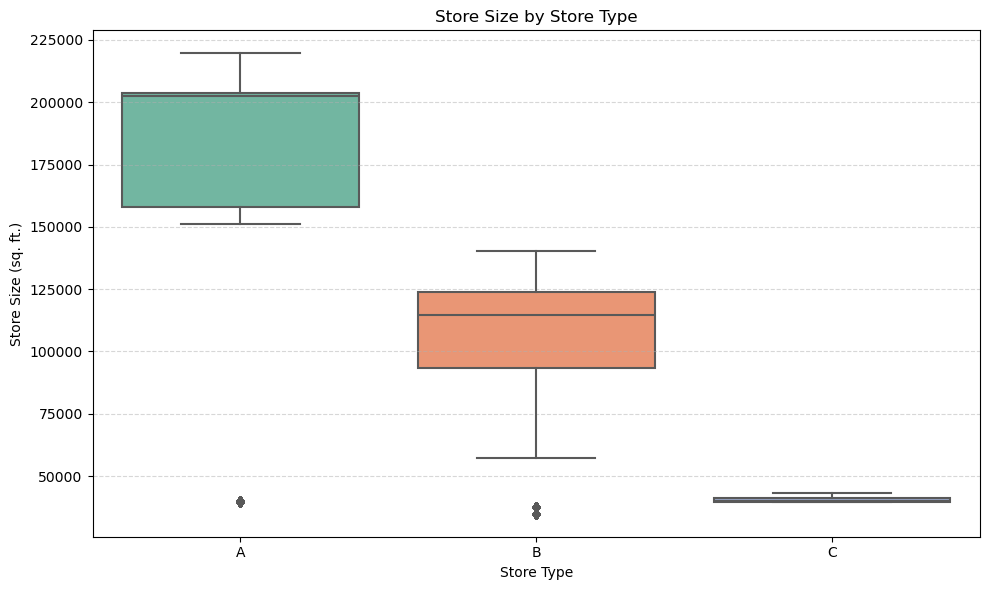

In [19]:
# Plotting the distribution of Store Size by Store type
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x="Type", y="Size", palette='Set2')

plt.title("Store Size by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Store Size (sq. ft.)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

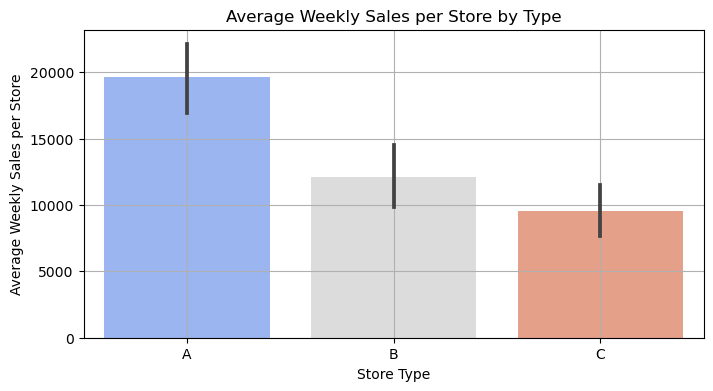

In [20]:
# Plotting Avg. weekly sales per store by store type
Grouped1 = train_df.groupby(['Store', 'Type'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.barplot(data=Grouped1, x='Type', y='Weekly_Sales', palette='coolwarm')
plt.title('Average Weekly Sales per Store by Type')
plt.xlabel('Store Type')
plt.ylabel('Average Weekly Sales per Store')
plt.grid(True)
plt.show()

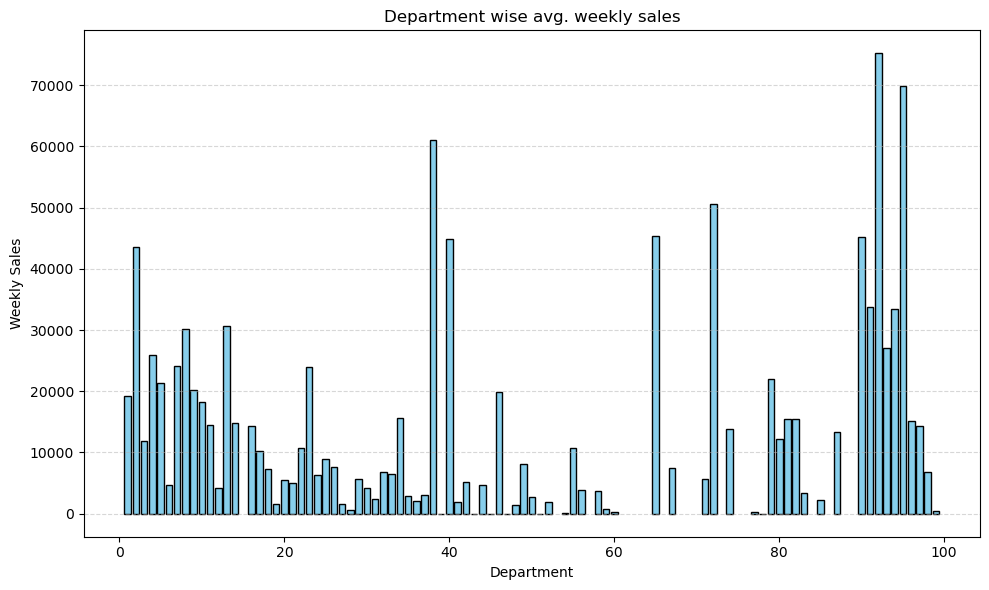

In [21]:
# Plotting Department Wise avg. weekly sales
Dept_Wise = train_df.groupby("Dept").agg({"Weekly_Sales":"mean"}).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(Dept_Wise["Dept"], Dept_Wise["Weekly_Sales"], color='skyblue', edgecolor='black')
plt.title("Department wise avg. weekly sales")
plt.xlabel("Department")
plt.ylabel("Weekly Sales")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Feature Engineering

In [22]:
# Encoding type of store
type_mapping = {'A': 1, 'B': 2, 'C': 3}
train_df['Type'] = train_df['Type'].map(type_mapping)
test_df['Type'] = test_df['Type'].map(type_mapping)

In [23]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,151315,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,1,151315,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,1,151315,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,1,151315,2010,3,5,9


Text(0.5, 1.0, 'Correlation Matrix')

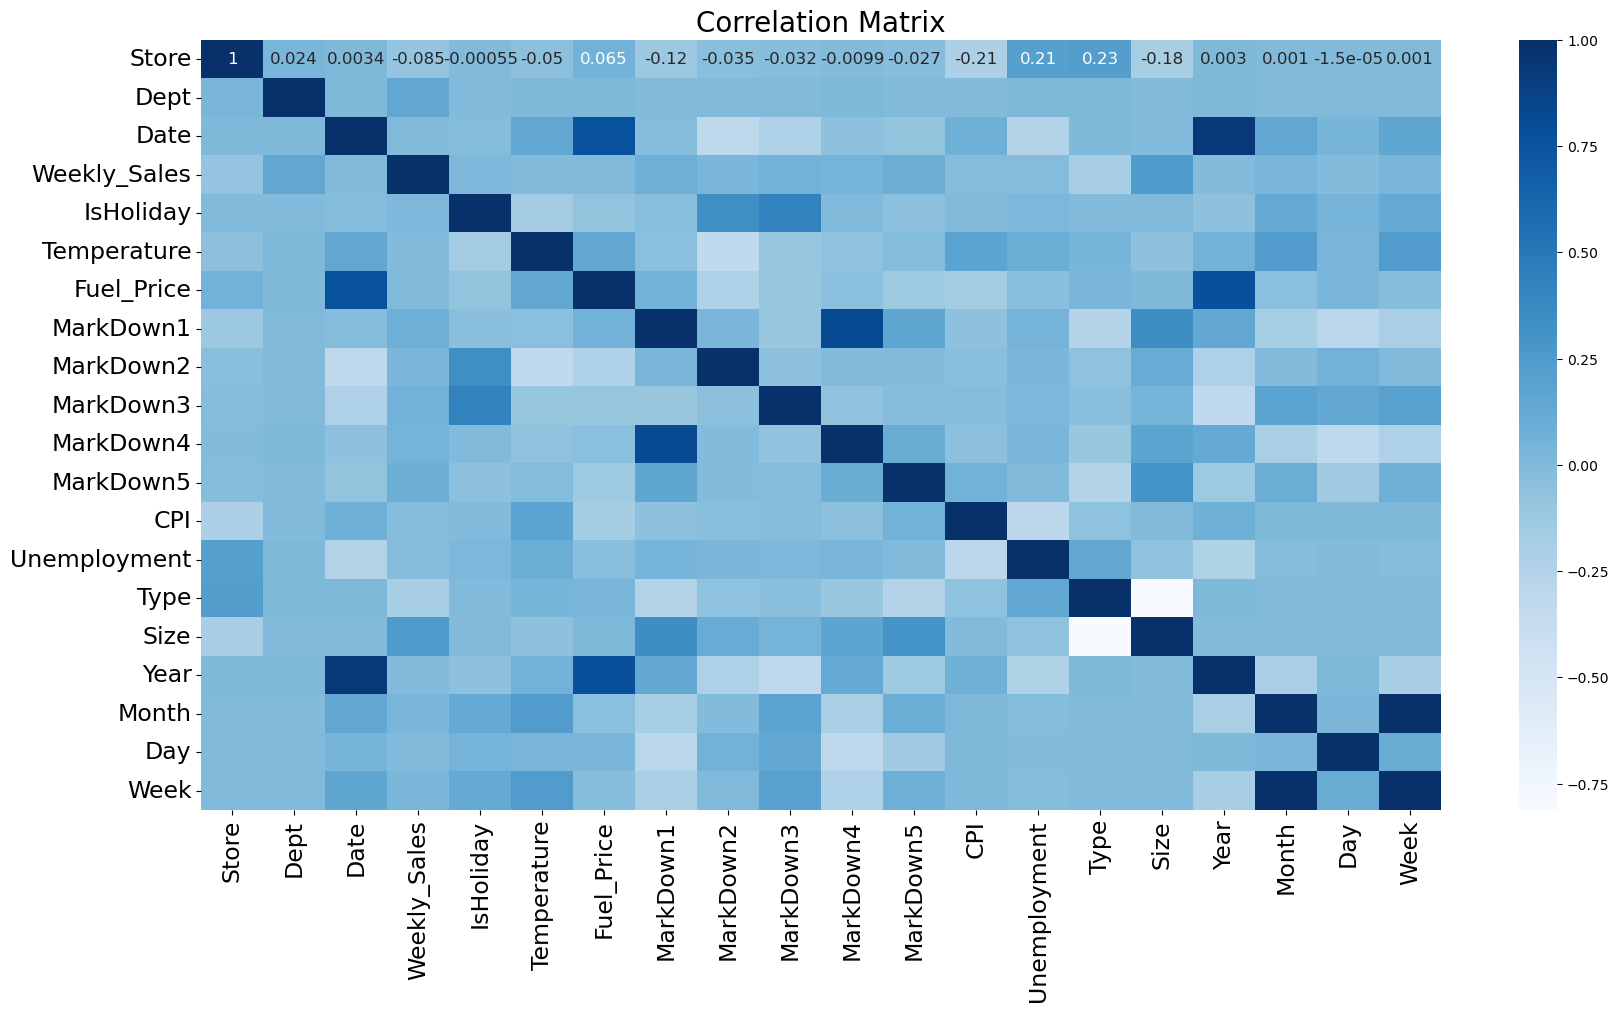

In [24]:
# Visualizing Correlations of various features
plt.figure(figsize=(20,10))
plt.xticks( fontsize=17)
plt.yticks( fontsize=17)

sns.heatmap(train_df.corr(), cmap='Blues', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=20)

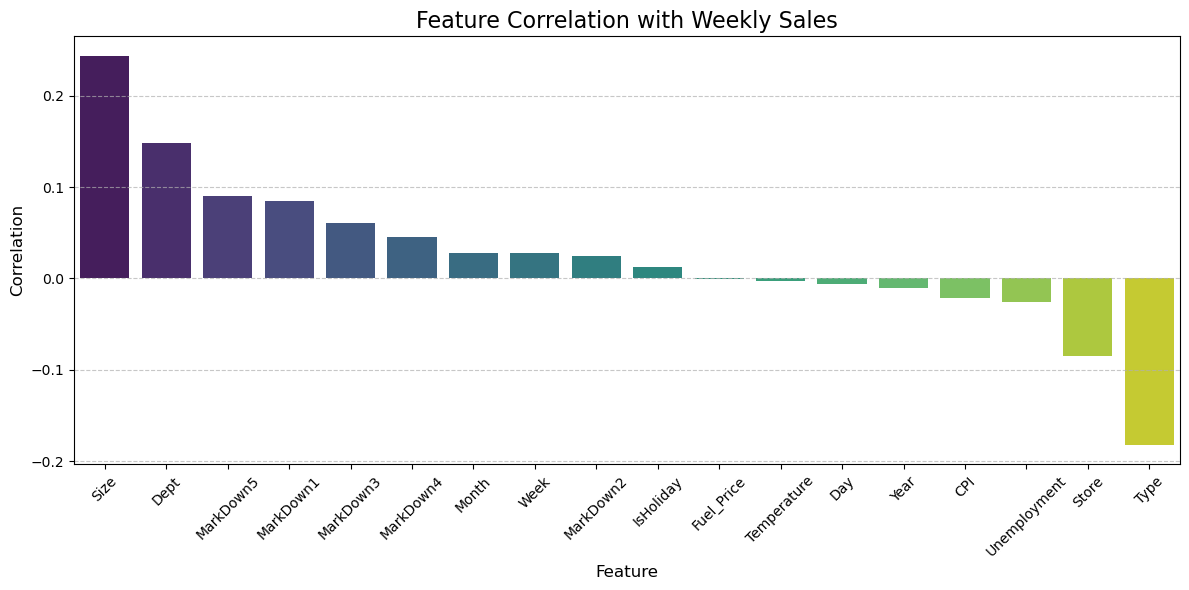

In [25]:
# Create correlation series
correlation = train_df.corr(numeric_only=True)['Weekly_Sales'].drop('Weekly_Sales').sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')

plt.title('Feature Correlation with Weekly Sales', fontsize=16)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Rajul Shah\AppData\Local\Temp\ipykernel_6776\2866147650.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  train_df.hist(ax=ax)


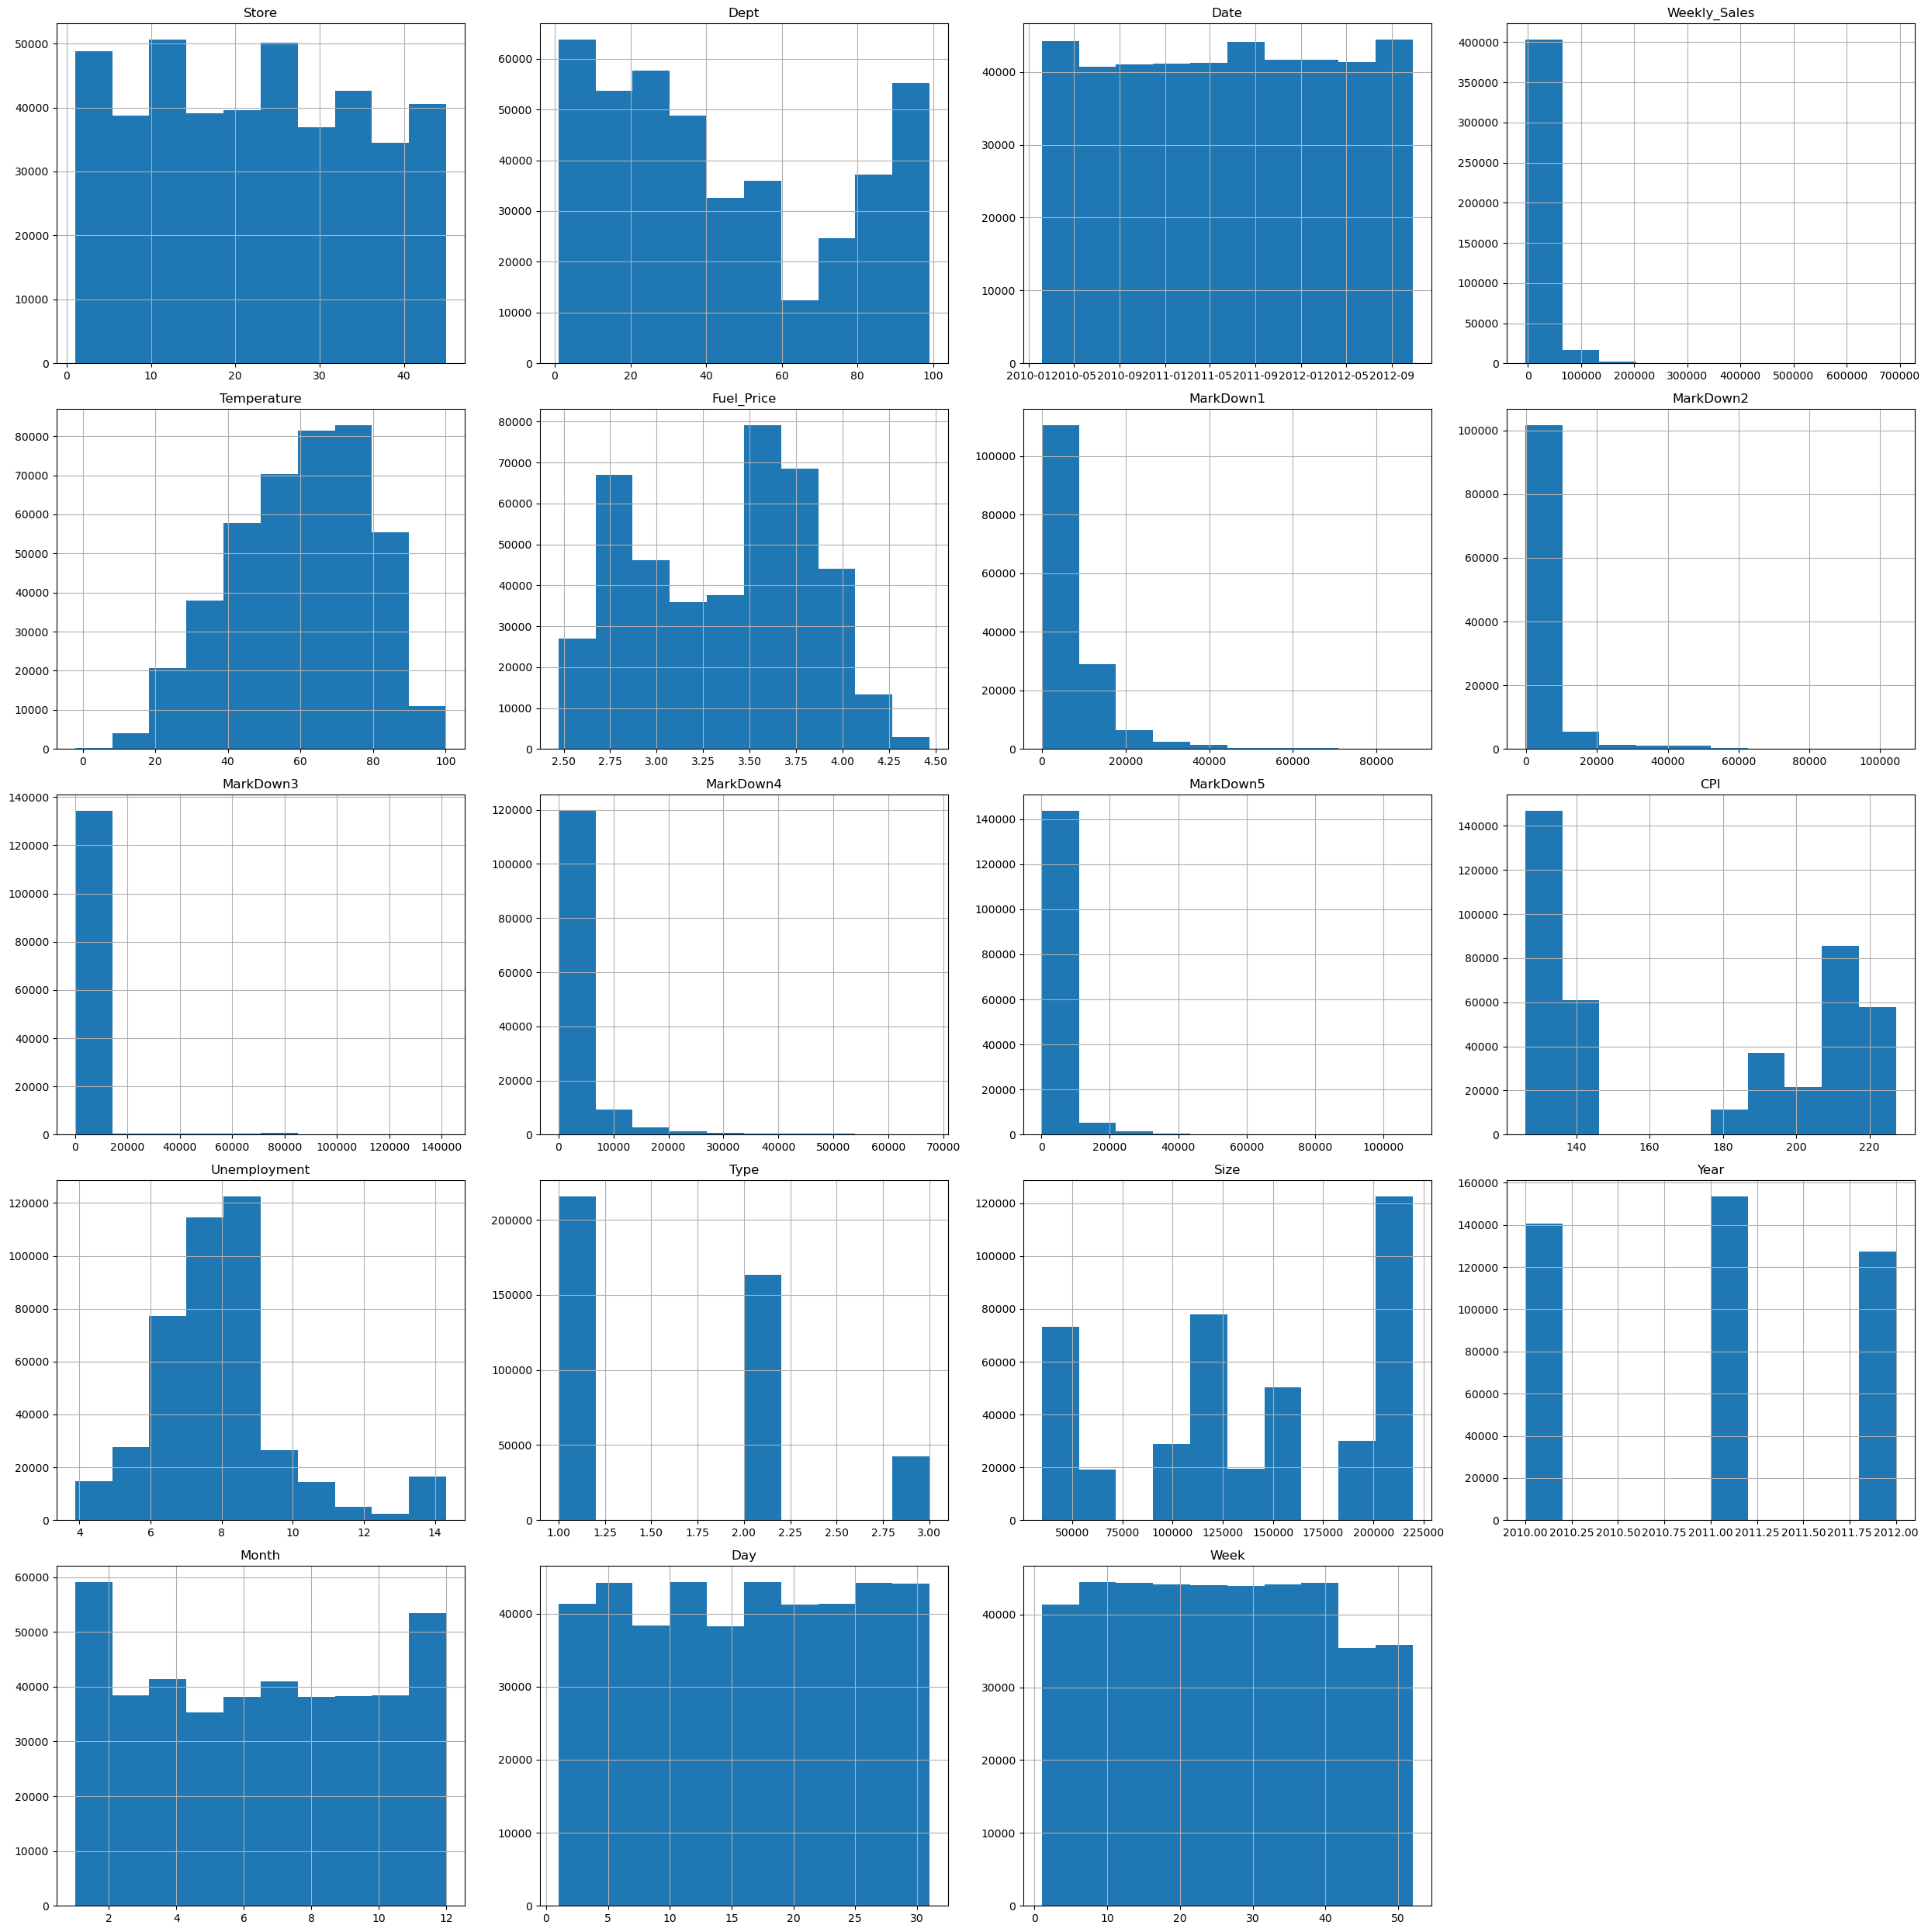

In [26]:
# Plotting histograms of all the features
fig = plt.figure(figsize=(25,25))
ax = fig.gca()
train_df.hist(ax=ax)
plt.tight_layout()

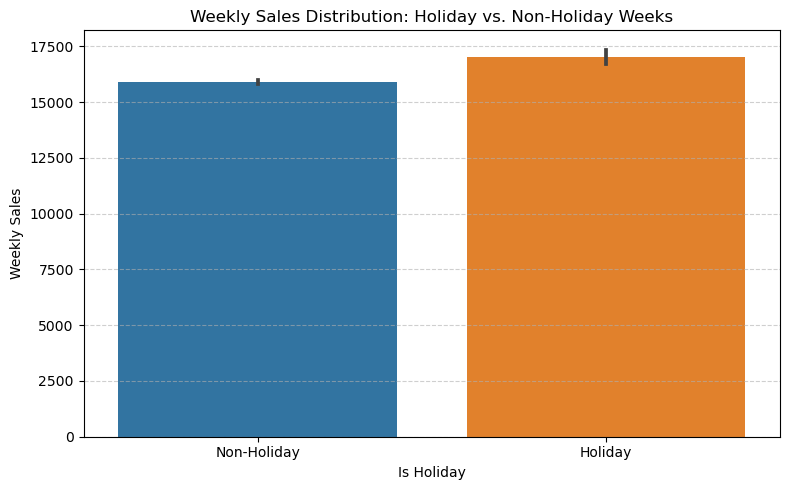

In [27]:
#Plotting Sales on Holiday Week Vs Non-holiday Week
plt.figure(figsize=(8, 5))
sns.barplot(data=train_df, x='IsHoliday', y='Weekly_Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title('Weekly Sales Distribution: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [28]:
# Replacing NAs with Zero
train_df= train_df.fillna(0)
test_df = test_df.fillna(0)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64       
 8   MarkDown2     421570 non-null  float64       
 9   MarkDown3     421570 non-null  float64       
 10  MarkDown4     421570 non-null  float64       
 11  MarkDown5     421570 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  int64         
 15  Size          421

In [52]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,2010,2,12,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,2010,2,19,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,2010,2,26,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,2010,3,5,9


In [31]:
# Allocating training and target variables
X = train_df.drop(["Weekly_Sales","Date"], axis=1)
Y = train_df["Weekly_Sales"]

In [32]:
X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1,151315,2010,2,5,5
1,1,1,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,151315,2010,2,12,6
2,1,1,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,1,151315,2010,2,19,7
3,1,1,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,1,151315,2010,2,26,8
4,1,1,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,1,151315,2010,3,5,9


In [53]:
# Dropping date column as we no longer require it
test_df_final=test_df.drop("Date",axis=1)

In [54]:
test_df_final.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,151315,2012,11,2,44
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,151315,2012,11,9,45
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,151315,2012,11,16,46
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,151315,2012,11,23,47
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,151315,2012,11,30,48


In [34]:
# Importing various ML models and other necessary tools
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [35]:
# Scaling the features and test Datasets.
scaler = StandardScaler()

X = scaler.fit_transform(X)
test_df_final = scaler.fit_transform(test_df_final)

In [36]:
# Splitting the training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [37]:
# Defining a function to fit various ML Algorithms
def pred_model(model,X_train,Y_train,X_test,Y_test):
    c = model()
    c.fit(X_train,Y_train)
    y_pred = c.predict(X_test)
    print(model)
    print(f'MSE: {mean_squared_error(Y_test,y_pred)}')
    print(f'MAE: {mean_absolute_error(Y_test,y_pred)}')
    print(f'R2 : {r2_score(Y_test,y_pred)}')
    return c, y_pred

In [38]:
# USING Linear Regression MODEL
pred_model(LinearRegression,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._base.LinearRegression'>
MSE: 474078057.5610317
MAE: 14559.461417484605
R2 : 0.0877673978559812


(LinearRegression(),
 array([19874.2376607 , 20216.99877858,  2076.38067783, ...,
        13334.47854787, 13483.90302041,  8873.95324543]))

In [39]:
# USING Lasso Regression MODEL
pred_model(Lasso,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._coordinate_descent.Lasso'>
MSE: 474072656.43227816
MAE: 14558.219615939748
R2 : 0.08777779084012971


(Lasso(),
 array([19830.49746431, 20415.14066682,  2179.52489178, ...,
        13393.47860861, 13452.63804349,  9091.37097958]))

In [40]:
# USING Ridge Regression MODEL
pred_model(Ridge,X_train,Y_train,X_test,Y_test)

<class 'sklearn.linear_model._ridge.Ridge'>
MSE: 474073980.5166244
MAE: 14559.180237516533
R2 : 0.0877752430046217


(Ridge(),
 array([19864.40522738, 20258.9757346 ,  2097.90541661, ...,
        13349.04668663, 13473.81659958,  8918.26572763]))

In [46]:
rf = RandomForestRegressor(
    n_estimators=200,       # number of trees
    max_depth=20,           # depth of each tree
    min_samples_split=4,    # min samples to split a node
    min_samples_leaf=2,     # min samples per leaf
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

In [47]:
# USING Random Forest Regressor MODEL
rf_model, y_pred = pred_model(RandomForestRegressor, X_train, Y_train, X_test, Y_test)

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
MSE: 13076332.567784153
MAE: 1381.1850875520872
R2 : 0.9748382008098431


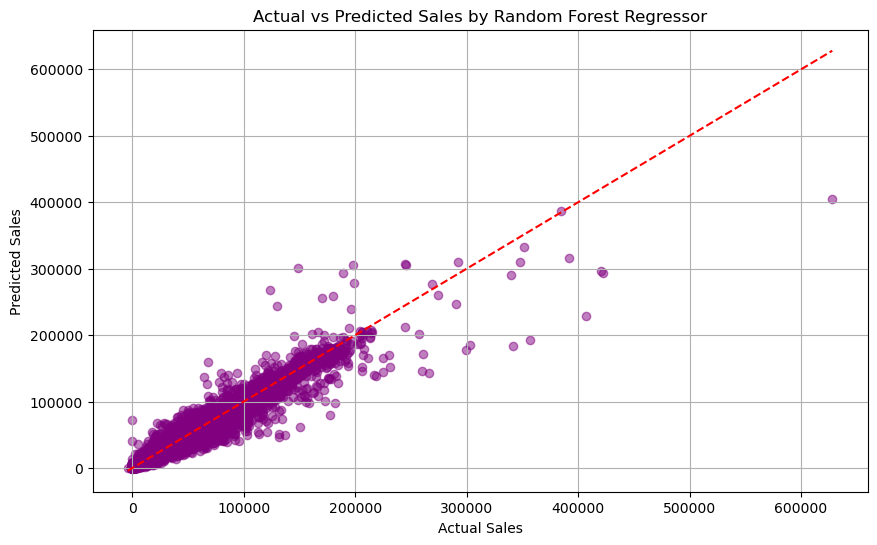

In [50]:
# Plotting the Acutal VS predicted Sales by RFR
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales by Random Forest Regressor')
plt.grid(True)
plt.show()

In [41]:
# Using XGBRegressor MODEL
from xgboost import XGBRegressor
clf_gbm = XGBRegressor(n_jobs=-1, 
                       n_estimators=400, 
                       max_depth=20, 
                       learning_rate=0.7)

In [43]:
clf_gbm.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.7, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=400, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
gbm_test_preds = clf_gbm.predict(X_test)

In [45]:
mse = mean_squared_error(Y_test, gbm_test_preds)
mae = mean_absolute_error(Y_test, gbm_test_preds)
r2 = r2_score(Y_test, gbm_test_preds)

print("MSE:", mse)
print("MAE:", mae)
print("R2 :", r2)

MSE: 13330343.852405872
MAE: 1538.7359052371535
R2 : 0.9743494260786596


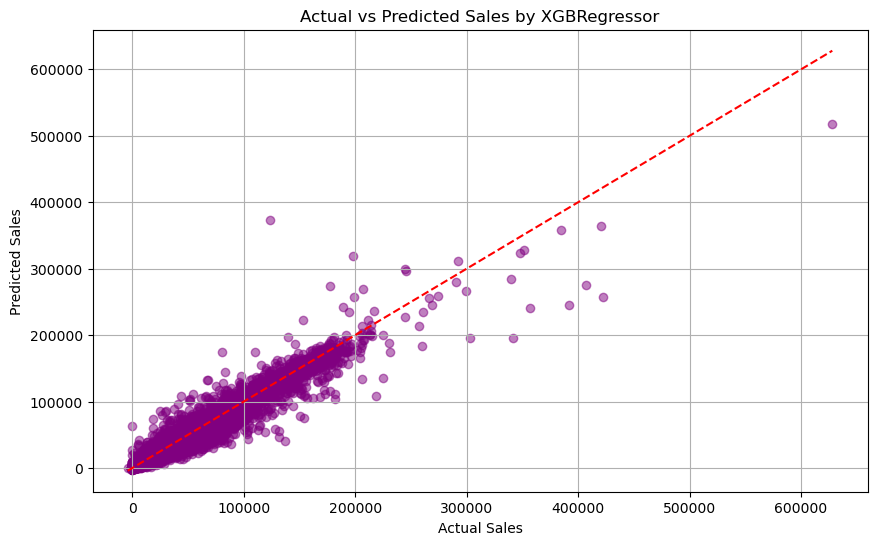

In [49]:
# Plotting Actual VS predicted Sales by XGBRegressor
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, gbm_test_preds, alpha=0.5, color='purple')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales by XGBRegressor')
plt.grid(True)
plt.show()

In [56]:
# Using the RFR model to predict sales for testing dataset
test_final_preds = rf_model.predict(test_df_final)
test_df_final['Weekly_Sales'] = test_final_preds

C:\Users\Rajul Shah\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [71]:
test_final_preds

array([21997.6028, 21997.6028, 21997.6028, ..., 10207.8845, 10207.8845,
        2689.0398])

In [76]:
# Using the XGBR model to predict sales for testing dataset
test_final_preds2 = clf_gbm.predict(test_df_final.drop(["Weekly_Sales"],axis=1))
test_final_preds2

array([17714.402 , 17714.402 , 17714.402 , ...,  3167.7627,  3167.7627,
        1817.9175], dtype=float32)

In [57]:
test_df_final.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Day,Week,Weekly_Sales
0,1,1,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,1,151315,2012,11,2,44,21997.6028
1,1,1,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,1,151315,2012,11,9,45,21997.6028
2,1,1,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,1,151315,2012,11,16,46,21997.6028
3,1,1,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,1,151315,2012,11,23,47,21939.1631
4,1,1,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,1,151315,2012,11,30,48,21939.1631


In [59]:
# Grouping the Weekly sales for the predicted values (of RFR Model)
weekly_sales_test_final = test_df_final.groupby(["Year", "Week"])["Weekly_Sales"].sum().reset_index()
pivot_df_test_final = weekly_sales_test_final.pivot(index="Week", columns="Year", values="Weekly_Sales")
print (pivot_df_test_final)

Year          2012          2013
Week                            
1              NaN  1.911934e+07
2              NaN  9.628478e+06
3              NaN  8.635024e+06
4              NaN  7.379575e+06
5              NaN  2.801330e+07
6              NaN  2.871282e+07
7              NaN  1.822130e+07
8              NaN  1.574379e+07
9              NaN  1.026774e+07
10             NaN  2.706844e+07
11             NaN  1.499446e+07
12             NaN  2.722580e+07
13             NaN  2.796737e+07
14             NaN  2.915503e+07
15             NaN  2.601117e+07
16             NaN  2.748915e+07
17             NaN  2.741699e+07
18             NaN  2.772376e+07
19             NaN  2.721581e+07
20             NaN  1.468036e+07
21             NaN  2.884233e+07
22             NaN  2.704866e+07
23             NaN  2.778245e+07
24             NaN  2.814994e+07
25             NaN  2.794370e+07
26             NaN  1.047791e+07
27             NaN  2.985262e+07
28             NaN  2.787857e+07
29        

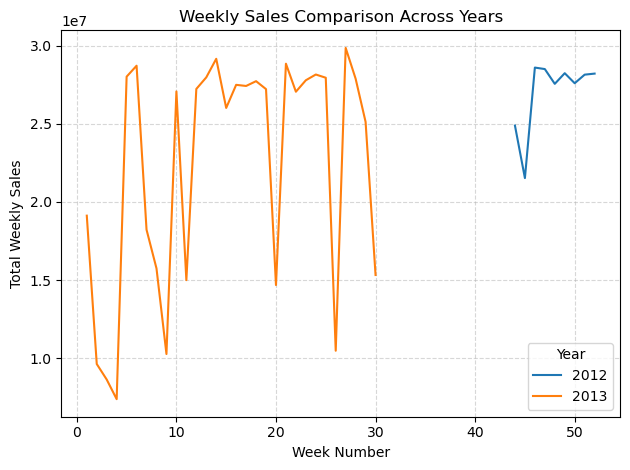

In [60]:
# Plotting the Weekly sales of predicted sales
for year in pivot_df_test_final.columns:
    plt.plot(pivot_df_test_final.index, pivot_df_test_final[year], label=str(year))

plt.title("Predicted Weekly Sales")
plt.xlabel("Week Number")
plt.ylabel("Total Weekly Sales")
plt.legend(title="Year")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [63]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         115064 non-null  int64  
 1   Dept          115064 non-null  int64  
 2   IsHoliday     115064 non-null  bool   
 3   Temperature   115064 non-null  float64
 4   Fuel_Price    115064 non-null  float64
 5   MarkDown1     115064 non-null  float64
 6   MarkDown2     115064 non-null  float64
 7   MarkDown3     115064 non-null  float64
 8   MarkDown4     115064 non-null  float64
 9   MarkDown5     115064 non-null  float64
 10  CPI           115064 non-null  float64
 11  Unemployment  115064 non-null  float64
 12  Type          115064 non-null  int64  
 13  Size          115064 non-null  int64  
 14  Year          115064 non-null  int32  
 15  Month         115064 non-null  int32  
 16  Day           115064 non-null  int32  
 17  Week          115064 non-null  UInt32 
 18  Week

In [65]:
test1= test

In [67]:
# Adding the results in test file.
test1[("Weekly_Sales")]=test_final_preds

In [68]:
test1.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,21997.6028
1,1,1,2012-11-09,False,21997.6028
2,1,1,2012-11-16,False,21997.6028
3,1,1,2012-11-23,True,21939.1631
4,1,1,2012-11-30,False,21939.1631


In [70]:
# Exporting the results to excel file
test1.to_excel("test_predictions.xlsx",index=False)